Zadania do samodzielnego wykonania

1)

Proszę wygenerować dane przypisane do dwóch klas K1 i K2, pochodzące z rozkładów normalnych N([0,-1],1) i N([1,1],1). Próba testująca powinna zawierać 200 punktów. Proszę sprawdzić skuteczność klasyfikacji dla 5, 10, 20 oraz 100 punktów uczących. W każdym wypadku proszę ustalić wzór hiperpłaszczyzny (w naszym wypadku - prostej) oddzielającej klasy, a następnie pokazać ją na wykresie razem z danymi.

2)

Analiza próbek benzyny wykazała że może ona być przypisana do dwóch klas czystości A i B (dla potrzeb zadania można je oznaczyć 0 i 1). Proszę skorzystać z pliku fuel.txt, w którym pierwsze trzy kolumny to właściwości fizykochemiczne próbek, czwarta kolumna - klasa czystości.

Proszę sprawdzić skuteczność sieci opartej o pojedynczy neuron do klasyfikacji w tym problemie, porównując wyniki dla pięciokrotnego uczenia sieci. Proszę potraktować wszystkie dane jako dane uczące.

3)

Proszę pobrać zbiór https://archive.ics.uci.edu/ml/datasets/iris. Można to też zrobić w pythonie używając funkcji sklearn.datasets.load_iris( ). Następnie proszę dokonać samodzielnego podziału na dane uczące i testujące w proporcji 80%/20%. Proszę zbudować sieć złożoną z pojedynczej warstwy perceptronów (np. używając omawianej już tutaj funkcji sklearn.linear_model.Perceptron), której zadaniem będzie jak najdokładniejsza klasyfikacja gatunków irysów na podstawie ich pomiarów. Proszę dokonać analizy macierzy pomyłek dla kilku uruchomień algorytmu. Zachęcam do rozważenia pytania: jaką największą trafność jest w stanie uzyskać w klasyfikacji irysów z podanego zbioru pojedyncza warstwa perceptronów? Dlaczego? (Podpowiedź: polecamy przyjrzeć się pojęciu liniowej separowalności)

4)

Proszę spróbować podzielić zbiór irysów na zbiór uczący i testujący na co najmniej 3 różne sposoby. Jak duży jest wpływ podziału na wynik?

5)

Proszę sprawdzić wpływ ilości epok na poprawność klasyfikacji zbioru irysów z poprzednich zadań, dla wybranych ilości epok (polecamy spróbować od jak najmniejszej, np. od 1 lub 2 epok). Żeby zapobiec wcześniejszemu przerywaniu uczenia, w pakiecie Sklearn można ustalić argument tol na odpowiednio małą liczbę czy ustawiając argument early_stopping na False. Można też zamiast tego (lub dodatkowo) nie wyłączać tych kryteriów i zamiast tego prawdzić wartość ilość faktycznych epok potrzebnych do ich osiągnięcia (n_iter_) Proszę przedstawić wnioski, np. na wykresie zależności średniej trafności klasyfikacji na zbiorze testującym w zależności od liczby epok.

In [64]:
%pip install -U scikit-learn
%pip install pandas



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


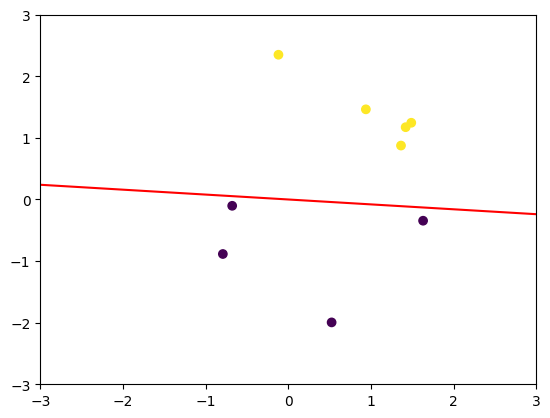

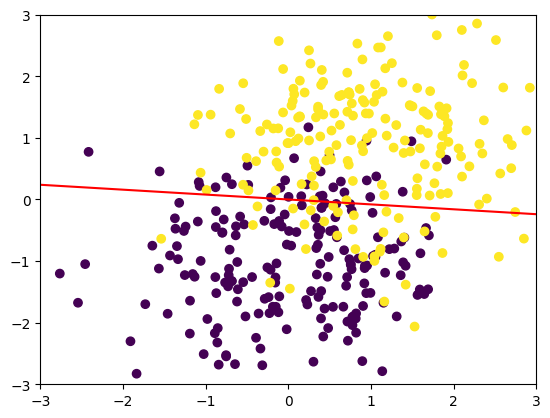

In [16]:
import numpy as np 
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

dataX = np.concatenate((np.random.normal([0,-1],[1,1], [5,2]), np.random.normal([1,1], [1,1], [5,2])))
dataY = np.concatenate((np.array([0]*5) , np.array([1]*5)))
testX = np.concatenate((np.random.normal([0,-1],[1,1], [200,2]), np.random.normal([1,1], [1,1], [200,2])  ))
testY = np.concatenate((np.array([0]*200) , np.array([1]*200)))


neuron1 = Perceptron(tol=1e-3, max_iter=100)

neuron1.fit(dataX,dataY)

x1 = np.linspace(-3,3,200)
neuron_1_x2 = -(1./neuron1.coef_[0][1])*(neuron1.coef_[0][0]*x1+neuron1.intercept_[0])


plt.plot(x1, neuron_1_x2, '-r')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.scatter(dataX[:,0], dataX[:,1], c=dataY)
plt.show()

neuron1.score(testX, testY)

neuron_1_x2 = -(1./neuron1.coef_[0][1])*(neuron1.coef_[0][0]*x1+neuron1.intercept_[0])


plt.plot(x1, neuron_1_x2, '-r')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.scatter(testX[:,0], testX[:,1], c=testY)
plt.show()



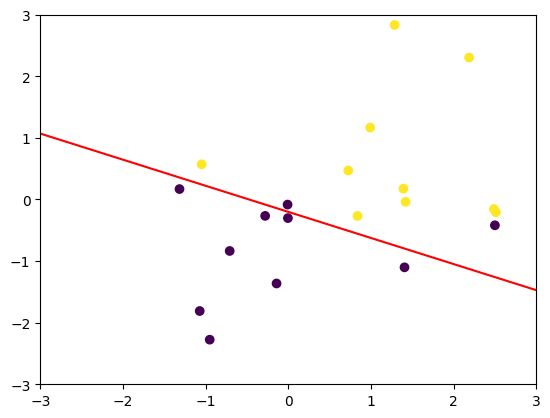

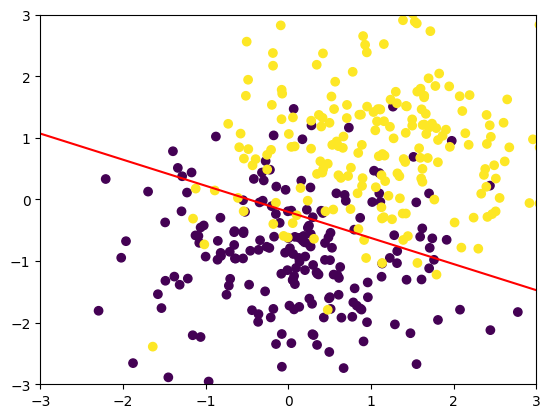

In [17]:
import numpy as np 
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

dataX = np.concatenate((np.random.normal([0,-1],[1,1], [10,2]), np.random.normal([1,1], [1,1], [10,2])))
dataY = np.concatenate((np.array([0]*10) , np.array([1]*10)))
testX = np.concatenate((np.random.normal([0,-1],[1,1], [200,2]), np.random.normal([1,1], [1,1], [200,2])  ))
testY = np.concatenate((np.array([0]*200) , np.array([1]*200)))

neuron1 = Perceptron(tol=1e-3, max_iter=100)

neuron1.fit(dataX,dataY)

x1 = np.linspace(-3,3,200)
neuron_1_x2 = -(1./neuron1.coef_[0][1])*(neuron1.coef_[0][0]*x1+neuron1.intercept_[0])


plt.plot(x1, neuron_1_x2, '-r')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.scatter(dataX[:,0], dataX[:,1], c=dataY)
plt.show()


neuron1.score(testX, testY)

neuron_1_x2 = -(1./neuron1.coef_[0][1])*(neuron1.coef_[0][0]*x1+neuron1.intercept_[0])


plt.plot(x1, neuron_1_x2, '-r')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.scatter(testX[:,0], testX[:,1], c=testY)
plt.show()


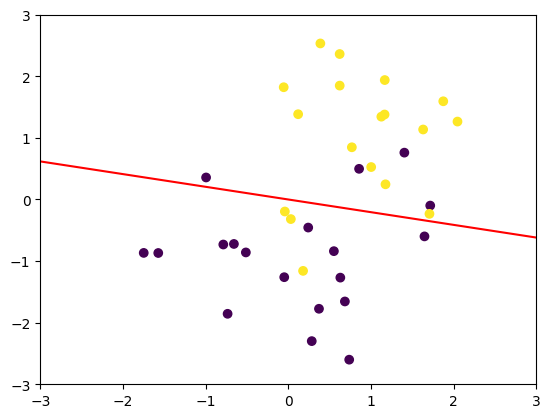

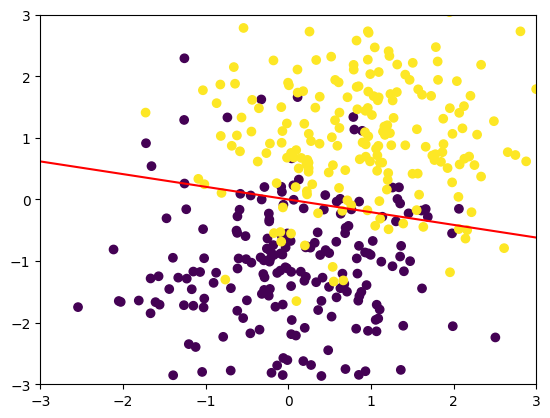

In [18]:
import numpy as np 
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

dataX = np.concatenate((np.random.normal([0,-1],[1,1], [20,2]), np.random.normal([1,1], [1,1], [20,2])))
dataY = np.concatenate((np.array([0]*20) , np.array([1]*20)))
testX = np.concatenate((np.random.normal([0,-1],[1,1], [200,2]), np.random.normal([1,1], [1,1], [200,2])  ))
testY = np.concatenate((np.array([0]*200) , np.array([1]*200)))

neuron1 = Perceptron(tol=1e-3, max_iter=100)

neuron1.fit(dataX,dataY)

x1 = np.linspace(-3,3,200)
neuron_1_x2 = -(1./neuron1.coef_[0][1])*(neuron1.coef_[0][0]*x1+neuron1.intercept_[0])


plt.plot(x1, neuron_1_x2, '-r')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.scatter(dataX[:,0], dataX[:,1], c=dataY)
plt.show()


neuron1.score(testX, testY)

neuron_1_x2 = -(1./neuron1.coef_[0][1])*(neuron1.coef_[0][0]*x1+neuron1.intercept_[0])


plt.plot(x1, neuron_1_x2, '-r')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.scatter(testX[:,0], testX[:,1], c=testY)
plt.show()

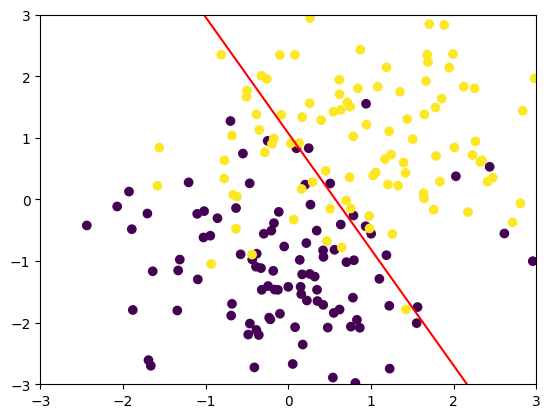

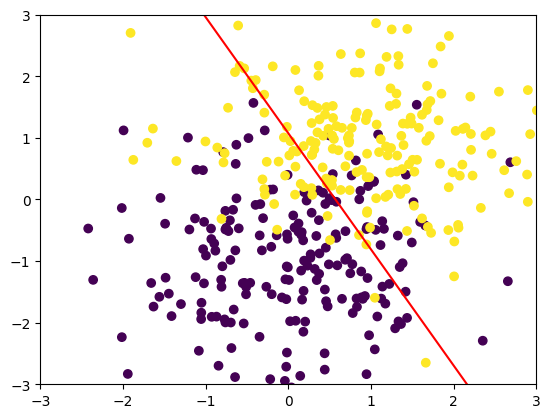

In [19]:
import numpy as np 
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt


dataX = np.concatenate((np.random.normal([0,-1],[1,1], [100,2]), np.random.normal([1,1], [1,1], [100,2])))
dataY = np.concatenate((np.array([0]*100) , np.array([1]*100)))
testX = np.concatenate((np.random.normal([0,-1],[1,1], [200,2]), np.random.normal([1,1], [1,1], [200,2])  ))
testY = np.concatenate((np.array([0]*200) , np.array([1]*200)))

neuron1 = Perceptron(tol=1e-3, max_iter=100)

neuron1.fit(dataX,dataY)

x1 = np.linspace(-3,3,200)
neuron_1_x2 = -(1./neuron1.coef_[0][1])*(neuron1.coef_[0][0]*x1+neuron1.intercept_[0])


plt.plot(x1, neuron_1_x2, '-r')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.scatter(dataX[:,0], dataX[:,1], c=dataY)
plt.show()


neuron1.score(testX, testY)

neuron_1_x2 = -(1./neuron1.coef_[0][1])*(neuron1.coef_[0][0]*x1+neuron1.intercept_[0])


plt.plot(x1, neuron_1_x2, '-r')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.scatter(testX[:,0], testX[:,1], c=testY)
plt.show()

2)

Analiza próbek benzyny wykazała że może ona być przypisana do dwóch klas czystości A i B (dla potrzeb zadania można je oznaczyć 0 i 1). Proszę skorzystać z pliku fuel.txt, w którym pierwsze trzy kolumny to właściwości fizykochemiczne próbek, czwarta kolumna - klasa czystości.

Proszę sprawdzić skuteczność sieci opartej o pojedynczy neuron do klasyfikacji w tym problemie, porównując wyniki dla pięciokrotnego uczenia sieci. Proszę potraktować wszystkie dane jako dane uczące.


In [69]:
from sklearn.metrics import confusion_matrix
import pandas as pd

arr = np.loadtxt('fuel.txt')
# print(type(arr))
print(arr.size)
print(arr.shape[0])
# print(arr)
FuelX = np.delete(arr, -1, axis=1)
FuelY = arr[:,-1]
# print(FuelY)


for _ in range(5):
    neuronFuel = Perceptron(tol =1e-3, max_iter = arr.shape[0] )
    neuronFuel.fit(FuelX, FuelY)
    print(neuronFuel.score(FuelX, FuelY))
    display(pd.DataFrame(confusion_matrix(FuelY,neuronFuel.predict(FuelX))))



# neuronFuel2 = Perceptron(tol =1e-3, max_iter = arr.shape[0] )
# neuronFuel2.fit(FuelX, FuelY)
# print(neuronFuel2.score(FuelX, FuelY))

# neuronFuel3 = Perceptron(tol =1e-3, max_iter = arr.shape[0] )
# neuronFuel3.fit(FuelX, FuelY)
# print(neuronFuel3.score(FuelX, FuelY))

# neuronFuel4 = Perceptron(tol =1e-3, max_iter = arr.shape[0] )
# neuronFuel4.fit(FuelX, FuelY)
# print(neuronFuel4.score(FuelX, FuelY))

# neuronFuel5 = Perceptron(tol =1e-3, max_iter = arr.shape[0] )
# neuronFuel5.fit(FuelX, FuelY)
# print(neuronFuel5.score(FuelX, FuelY))




120
30
0.5333333333333333


,0,1
0,15,0
1,14,1


0.5333333333333333


,0,1
0,15,0
1,14,1


0.5333333333333333


,0,1
0,15,0
1,14,1


0.5333333333333333


,0,1
0,15,0
1,14,1


0.5333333333333333


,0,1
0,15,0
1,14,1


In [6]:
%pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 4.2 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


3)

Proszę pobrać zbiór https://archive.ics.uci.edu/ml/datasets/iris. 
Można to też zrobić w pythonie używając funkcji 
sklearn.datasets.load_iris( ). 
Następnie proszę dokonać samodzielnego podziału na dane uczące 
i testujące w proporcji 80%/20%. Proszę zbudować sieć złożoną 
z pojedynczej warstwy perceptronów (np. używając omawianej już tutaj funkcji
sklearn.linear_model.Perceptron), której zadaniem będzie jak najdokładniejsza
klasyfikacja gatunków irysów na podstawie ich pomiarów. 
Proszę dokonać analizy macierzy pomyłek dla kilku uruchomień algorytmu. 
Zachęcam do rozważenia pytania: 
jaką największą trafność jest w stanie uzyskać w klasyfikacji irysów 
z podanego zbioru pojedyncza warstwa perceptronów?
Dlaczego? (Podpowiedź: polecamy przyjrzeć się pojęciu liniowej separowalności)



0.9666666666666667


,0,1,2
0,50,0,0
1,27,19,4
2,0,1,49


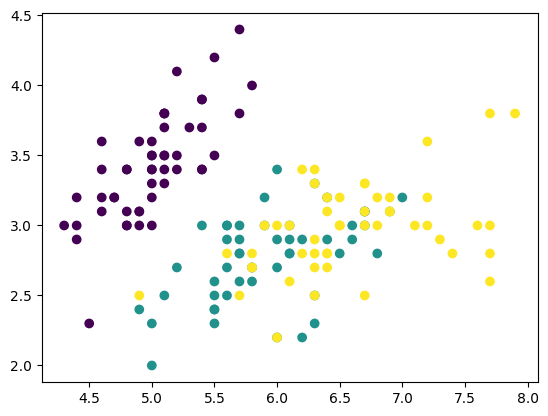

In [70]:
from sklearn.datasets import load_iris
from IPython.display import display


x,y = load_iris(return_X_y= True)
learnSize = int(len(x)*0.8)
learnData = x[:learnSize]
learnLabel = y[:learnSize]
# learnY = np.concatenate((np.zeros((40,)) , np.array([1]*40), np.array([2]*40)))

testData = x[learnSize:]
testLabel = y[learnSize:]
neuron = Perceptron(tol =1e-3,max_iter=100)
neuron.fit(learnData,learnLabel)
print(neuron.score(testData, testLabel))
display(pd.DataFrame(confusion_matrix(y,neuron.predict(x))))




plt.scatter(x[:,0], x[:,1], c=y)
plt.show()


4)

Proszę spróbować podzielić zbiór irysów 
na zbiór uczący i testujący na co najmniej 3 różne sposoby.
Jak duży jest wpływ podziału na wynik?

In [84]:
from sklearn.model_selection import train_test_split



x,y = load_iris(return_X_y= True)

for testSize in [0.2,0.5,0.8]:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=testSize, shuffle=True, random_state=7)
    neuron = Perceptron(tol =1e-3,max_iter=100)
    neuron.fit(x_train,y_train)
    print(neuron.score(x_test, y_test))
    display(pd.DataFrame(confusion_matrix(y,neuron.predict(x))))



0.7666666666666667


,0,1,2
0,50,0,0
1,7,31,12
2,0,0,50


0.5066666666666667


,0,1,2
0,5,45,0
1,0,50,0
2,0,30,20


0.6666666666666666


,0,1,2
0,49,1,0
1,0,50,0
2,0,48,2


5)

Proszę sprawdzić wpływ ilości epok na poprawność klasyfikacji 
zbioru irysów z poprzednich zadań, 
dla wybranych ilości epok 
(polecamy spróbować od jak najmniejszej, np. od 1 lub 2 epok).
Żeby zapobiec wcześniejszemu przerywaniu uczenia, 
w pakiecie Sklearn można ustalić argument tol na odpowiednio 
małą liczbę czy ustawiając argument early_stopping na False. 
Można też zamiast tego (lub dodatkowo) nie wyłączać 
tych kryteriów i zamiast tego prawdzić wartość ilość
faktycznych epok potrzebnych do ich osiągnięcia (n_iter_) 
Proszę przedstawić wnioski, 
np. na wykresie zależności średniej trafności klasyfikacji
na zbiorze testującym w zależności od liczby epok.
